1.Description of dataset – How many variables and observations? What is the unit of analysis? What is the source of your data? How was it collected? (5 pts)

2.Identify and describe a minimum of three likely independent variables and at least two possible dependent variables. In this section, you should indicate each variable’s level of measurement (e.g. nominal, interval-ratio, etc.) and 1-2 sentences describing in simple terms what it measures. (10 pts)

3.Descriptive statistics – generate and interpret the appropriate measures of central tendency and dispersion for each of the selected variables. (15 pts)

4.Visualizations to describe the distribution, skewness, outliers, etc. of each of your selected variables (10 pts). Use visuals such as boxplots, histograms, bar charts, etc. (20 pts)

5.Describe and visualize missingness of data in file overall and specifically with key variables of interest. Provide visual description and summary of missingness.  What kind of missingness do you think it is? (15 pts)

6.Summarize associations/relationships among the selected key variables with appropriate statistics and visualizations (20 pts)

# Business Entity Licensing Data Analysis

This analysis examines the business entity licensing data, focusing on key attributes such as license categories, business entity names, and geographical information.

In [ ]:
# Import necessary libraries
# requests: to make HTTP requests to APIs
# pandas: to work with data structures (e.g., DataFrames) and perform data analysis
import requests
import pandas as pd


## Fetching DLCP Data and Creating a DataFrame

This code snippet retrieves data from the DLCP API using a GET request, converts the response to JSON format, and extracts the 'features' to load into a pandas DataFrame for further manipulation.

### Steps:
1. Send an HTTP GET request to the DLCP API.
2. Convert the response content to JSON format.
3. Extract relevant features from the JSON response.
4. Load the data into a pandas DataFrame and display the first few rows.


In [ ]:
# URL from the DLCP
url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/DCRA/MapServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"

# Make a GET request to fetch the data
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Convert the response content to JSON
    data = response.json()

    # Extract the 'features' from the JSON response
    features = data['features']

    # Convert the features into a DataFrame
    license_df = pd.json_normalize(features)

    # Display the DataFrame
    print(license_df.head())
else:
    print(f"Error: Unable to fetch data (status code {response.status_code})")


  attributes.BILLING_ADDRESS  attributes.BILLING_ADDRESS_CITY_STATE_ZIP  \
0                    Floor 3  1203 19th Street NW  Washington DC 20036    
1                 SUITE 1600           1441 BROADWAY NEW YORK NY 10018    
2                       None      35 Bigelow Ave  Mill Valley CA 94941    
3                       1000  1050 Connecticut Ave Washington DC 20036    
4                       None   3014 V Place, SE SE Washington DC 20020    

                             attributes.AGENT_ENTITY  \
0          Friendly Design Co.; Geoffrey Silverstein   
1                              CT CORPORATION SYSTEM   
2                                    Daniel Margolis   
3  ROCK SOLID District Group LLC; InCorp Services...   
4                                        Curry Cheek   

  attributes.AGENT_FIRST_NAME attributes.AGENT_LAST_NAME  \
0                        None                       None   
1                        None                       None   
2                        None   

In [ ]:
#Displaying the first ten rows of the License dataframe (license_df)
license_df.head(10)

,attributes.BILLING_ADDRESS,attributes.BILLING_ADDRESS_CITY_STATE_ZIP,attributes.AGENT_ENTITY,attributes.AGENT_FIRST_NAME,attributes.AGENT_LAST_NAME,attributes.AGENT_MIDDLE_NAME,attributes.AGENT_PHONE,attributes.SITE_ADDRESS,attributes.BBL_CITY_STATE_ZIP,attributes.BILLING_NAME,...,attributes.ZIPCODE,attributes.MARADDRESSREPOSITORYID,attributes.WARD,attributes.ANC,attributes.SMD,attributes.DISTRICT,attributes.PSA,attributes.NEIGHBORHOODCLUSTER,attributes.BUSINESSIMPROVEMENTDISTRICT,attributes.MAINSTREET
0,Floor 3,1203 19th Street NW Washington DC 20036,Friendly Design Co.; Geoffrey Silverstein,None,None,None,314-276-6609,1203 19TH ST NW,Washington DC 20036,None,...,None,278920.0,2,ANC 2B,2B05,SECOND,208,Cluster 6,Golden Triangle BID,None
1,SUITE 1600,1441 BROADWAY NEW YORK NY 10018,CT CORPORATION SYSTEM,None,None,None,2025723100,11 DUPONT CIR NW,Washington DC 20036,None,...,None,225450.0,2,ANC 2B,2B07,SECOND,208,Cluster 6,Dupont Circle BID,None
2,None,35 Bigelow Ave Mill Valley CA 94941,Daniel Margolis,None,None,None,202-232-5258,35 Bigelow Ave,Mill Valley CA 94941,None,...,None,NaN,None,None,None,None,None,None,None,None
3,1000,1050 Connecticut Ave Washington DC 20036,ROCK SOLID District Group LLC; InCorp Services...,None,None,None,800-737-3372,1050 CONNECTICUT AVE NW,Washington DC 20036,None,...,None,243417.0,2,ANC 2C,2C02,SECOND,207,Cluster 6,Golden Triangle BID,None
4,None,"3014 V Place, SE SE Washington DC 20020",Curry Cheek,None,None,None,301-325-4103,3014 V PL SE,Washington DC 20020,None,...,None,41905.0,7,ANC 7B,7B02,SIXTH,606,Cluster 35,None,None
5,B,1735 Holbrook St NE Washington DC 20002,Murphys Carpet Care LLC; Andre Murphy,None,None,None,240-876-4219,1735 HOLBROOK ST NE,Washington DC 20002,None,...,None,56712.0,5,ANC 5D,5D05,FIFTH,506,Cluster 23,None,None
6,416,1610 park rd nw NW Washington DC 20010,Worldwide Solutions USA; David Marin,None,None,None,301-256-8773,1610 PARK RD NW,Washington DC 20010,None,...,None,233557.0,1,ANC 1D,1D04,THIRD,302,Cluster 2,None,None
7,UNIT #501,955 26 STREET NW WASHINGTON DC 20037,CHARLTON DESIGNS,MATTHEW,CHARLTON,None,(954) 608-3922,955 26TH ST NW,WASHINGTON DC 20037,None,...,None,274742.0,2,ANC 2A,2A03,SECOND,207,Cluster 5,None,None
8,205,575 Underhill Blvd Syosset NY 11791,Sarabjit Lamba,None,None,None,516-813-9593,3508 CONNECTICUT AVE NW,Washington DC 20008,None,...,None,276061.0,3,ANC 3C,3C06,SECOND,203,Cluster 15,None,None
9,Suite 1150,1801 K St NW NW Washington DC 20006,CT Corporation System,None,None,None,202-572-3163,1801 K ST NW,Washington DC 20006,None,...,None,279398.0,2,ANC 2C,2C02,SECOND,207,Cluster 6,Golden Triangle BID,None


In [ ]:
print(license_df.columns)

Index(['attributes.BILLING_ADDRESS',
       'attributes.BILLING_ADDRESS_CITY_STATE_ZIP', 'attributes.AGENT_ENTITY',
       'attributes.AGENT_FIRST_NAME', 'attributes.AGENT_LAST_NAME',
       'attributes.AGENT_MIDDLE_NAME', 'attributes.AGENT_PHONE',
       'attributes.SITE_ADDRESS', 'attributes.BBL_CITY_STATE_ZIP',
       'attributes.BILLING_NAME', 'attributes.CUSTOMER_NUMBER',
       'attributes.DC_ADDR_FLAG', 'attributes.LICENSECATEGORY',
       'attributes.ENTITY_NAME', 'attributes.FIRST_NAME',
       'attributes.LAST_NAME', 'attributes.DCS_ADD_DATE',
       'attributes.LICENSE_END_DATE', 'attributes.LICENSE_ISSUE_DATE',
       'attributes.LICENSE_START_DATE', 'attributes.LICENSE_CATEGORY_TEXT',
       'attributes.LICENSE_CATEGORY_CODE', 'attributes.LICENSESTATUS',
       'attributes.PHONE_NUMBER', 'attributes.OBJECTID', 'attributes.CITY',
       'attributes.STATE', 'attributes.ZIP', 'attributes.BBL_LICENSE_FACT_ID',
       'attributes.DCS_LAST_MOD_DTTM', 'attributes.LATITUDE',
     

## Extracting Unique License Categories and Displaying Entity Names

This code performs three key tasks involving the exploration of license data. It focuses on extracting unique values from two license-related columns and displaying a portion of the entity names in the dataset.


### 1. Extract Unique Values for `LICENSE_CATEGORY_TEXT` and 'WARD LEVEL'
This chunk retrieves and displays the unique license category descriptions from the `attributes.LICENSE_CATEGORY_TEXT` column, providing an overview of the different types of licenses represented.


In [ ]:
# Extract unique values for the LICENSE_CATEGORY_TEXT column
unique_license_categories = license_df['attributes.LICENSE_CATEGORY_TEXT'].unique()
unique_zipcodes=license_df['attributes.WARD'].unique()
# Display the unique values
print(unique_license_categories)
print("Unique zipcode categories:", unique_zipcodes)


['General Business' 'Environmental Materials' 'General Service and Repair'
 'Employment Services' 'Entertainment' 'General Sales']
Unique zipcode categories: ['2' None '7' '5' '1' '3' '6' '4' '8']


### 2. Extract Unique Values for `LICENSECATEGORY`
This chunk extracts and displays the unique values in the `attributes.LICENSECATEGORY` column, which may represent a different classification system for licenses.


In [ ]:
# Extract unique values for the LICENSECATEGORY column
unique_license_category = license_df['attributes.LICENSECATEGORY'].unique()

# Display the unique values
print(unique_license_category)


['Cooperative Association' 'Cigarette Retail' 'Apartment'
 'One Family Rental' 'General Business Licenses' 'Delicatessen'
 'Food Products' 'Grocery Store' 'Restaurant' 'Barber Chair'
 'Beauty Booth' 'Gasoline Dealer' 'Home Improvement Contractor'
 'Home Improvement Salesman']


### 3. Display Entity Names
The third chunk displays the first 10 values from the `attributes.ENTITY_NAME` column, which contains the names of the entities associated with the licenses.


In [ ]:
# Display the ENTITY_NAME column from license_df
license_df['attributes.ENTITY_NAME'].head(10)


,attributes.ENTITY_NAME
0,THE COPELAND MANOR COOPERATIVE INC
1,None
2,EJF REAL ESTATE SERVICES
3,CHANCELLERY CONDOMINIUM
4,"Wiley Management, Inc.; Kevin Wiley"
5,"1409 11th Street Cooperative, Inc."
6,KS Property Management LLC
7,VISION REALTY MANAGEMENT LLC
8,LEALAND COOPERATIVE INC
9,PAUL LAURENCE DUNBAR TENANT ASSOCIATION


## Counting and Calculating the Percentage of Missing `ENTITY_NAME` Values

Since the `ENTITY_NAME` column contains some missing (`None` or `NaN`) values, it's essential to identify how many business entity names are missing. This section will count the missing values and calculate what percentage of the total dataset is affected by these missing entries.

### Code Explanation:
1. **Count the missing values**: First, we count how many rows in the `attributes.ENTITY_NAME` column have a missing (`None` or `NaN`) value.
2. **Calculate the percentage**: Next, we compute the percentage of missing values by dividing the count by the total number of rows in the DataFrame.

In [ ]:
# Count the number of None or NaN values in the ENTITY_NAME column
none_count = license_df['attributes.ENTITY_NAME'].isna().sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(license_df)

# Calculate the percentage of missing values
percentage_none = (none_count / total_rows) * 100

# Display the count of None/NaN values with a professional print statement
print(f"There are {none_count} missing business entity names out of {total_rows} total entries.")

# Display the percentage of missing values
print(f"Percentage of missing ENTITY_NAME values: {percentage_none:.2f}%")


There are 138 missing business entity names out of 1000 total entries.
Percentage of missing ENTITY_NAME values: 13.80%


# PART 2 OF DATA EXPLORATION: EXPLORING FULL DLCP DATASET

DATA EXPLORATION REQUIREMENTS:


1.Description of dataset – How many variables and observations? What is the unit of analysis? What is the source of your data? How was it collected? (5 pts)

2.Identify and describe a minimum of three likely independent variables and at least two possible dependent variables. In this section, you should indicate each variable’s level of measurement (e.g. nominal, interval-ratio, etc.) and 1-2 sentences describing in simple terms what it measures. (10 pts)

3.Descriptive statistics – generate and interpret the appropriate measures of central tendency and dispersion for each of the selected variables. (15 pts)

4.Visualizations to describe the distribution, skewness, outliers, etc. of each of your selected variables (10 pts). Use visuals such as boxplots, histograms, bar charts, etc. (20 pts)

5.Describe and visualize missingness of data in file overall and specifically with key variables of interest. Provide visual description and summary of missingness.  What kind of missingness do you think it is? (15 pts)

6.Summarize associations/relationships among the selected key variables with appropriate statistics and visualizations (20 pts)

## DLCP Dataset Access

This Python script is designed to connect to the **DLCP Business License Datasets**, stored in an SQLite database. The purpose of the script is to retrieve, process, and combine data from multiple tables within the DLCP database to make the information easier to analyze and work with.

#### Key Steps in the Script:

1. **Database Connection**:
   The script establishes a connection to the SQLite database file (`DLCP_BBL.db`), which contains the DLCP business license data. This connection allows the script to run SQL queries and fetch data from the relevant tables.

2. **Fetching and Displaying Table Data**:
   - The script uses functions to:
     - Fetch and display the column names and sample data (first 5 rows) from each table.
     - Get the shape (number of rows and columns) of each table to provide an overview of the data size.
     - Convert entire tables into pandas DataFrames for further data analysis.
   
   The tables being accessed are:
   - `License_Application_Details`
   - `NAICS_data`
   - `App_Specific_Information`

3. **Converting Tables to DataFrames**:
   Each table is converted into a pandas DataFrame, a widely-used format in Python for data manipulation. This conversion allows for efficient data handling and analysis.

4. **Sorting Data**:
   The script sorts the data in each DataFrame by the `License Application ID`, ensuring the records are organized in a consistent manner.

5. **Merging Data**:
   The script merges the three DataFrames into one combined dataset called `business_license_df`. The merge is performed on the `License Application ID` field, linking related data across the different tables.

6. **Previewing and Displaying Results**:
   After merging, the script shows a preview of the first 10 rows of the combined dataset and prints the overall dimensions (number of rows and columns) of the final dataset.

#### Purpose:
The goal of the script is to provide a simple and effective way to access, organize, and analyze the **DLCP Business License Datasets** by connecting to the database, converting the data into a more flexible format (DataFrames), and preparing it for further analysis or reporting.


In [ ]:

import sqlite3
import pandas as pd

!pip install --upgrade pip

# Path to your DLCP_BBL.db file (Change your path to where you saved this db document)
db_path = "/content/DLCP_BBL.db"

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Create a cursor object
cursor = conn.cursor()
cursor

In [ ]:
def fetch_and_display_table_data(table_name):
    """
    Fetches and displays the column names and the first 5 rows of data from the specified table.

    Parameters:
    table_name (str): The name of the table from which to fetch data.

    The function will:
    - Execute a SQL query to select the first 5 rows from the specified table.
    - Fetch and print the column names of the table.
    - Fetch and print the first 5 rows of data from the table.

    Note:
    This function assumes that the database connection and cursor have already been established.
    """

    # Query to select the first 5 rows from the specified table
    cursor.execute(f"SELECT * FROM {table_name} LIMIT 5;")

    # Fetch the column names from the cursor's description (metadata about the query result)
    column_names = [description[0] for description in cursor.description]
    print(f"\nColumn names for {table_name}:")
    print(column_names)  # Print the column names

    # Fetch the rows from the executed query (up to 5 rows due to the LIMIT clause)
    rows = cursor.fetchall()

    # Print the rows of data retrieved from the table
    print(f"\n{table_name} Table Data:")
    for row in rows:
        print(row)  # Print each row from the query result
def get_table_shape(table_name):
    """
    Fetches and prints the shape (i.e., number of rows and columns) of the specified table.

    Parameters:
    table_name (str): The name of the table for which to get the shape.

    The function will:
    - Execute a query to retrieve a single row from the table to determine the number of columns.
    - Execute a query to count the total number of rows in the table.
    - Print the number of rows and columns (i.e., the shape) of the table.

    Note:
    This function assumes that the database connection and cursor have already been established.
    """

    # Get the number of columns by retrieving a single row and examining the column metadata
    cursor.execute(f"SELECT * FROM {table_name} LIMIT 1;")
    num_columns = len(cursor.description)

    # Get the number of rows by counting all rows in the table
    cursor.execute(f"SELECT COUNT(*) FROM {table_name};")
    num_rows = cursor.fetchone()[0]

    # Print the shape of the table (rows and columns)
    print(f"Shape of {table_name}:")
    print(f"Rows: {num_rows}, Columns: {num_columns}\n")
def table_to_dataframe(table_name):
    """
    Converts the specified SQLite table into a pandas DataFrame and displays the first 5 rows.

    Parameters:
    table_name (str): The name of the SQLite table to be converted into a DataFrame.

    The function will:
    - Execute a SQL query to select all rows and columns from the specified table.
    - Convert the SQL result into a pandas DataFrame.
    - Print the first 5 rows of the DataFrame for a quick preview.

    Returns:
    pandas.DataFrame: A DataFrame containing all the data from the specified table.

    Note:
    This function assumes that the database connection (conn) has already been established and
    the 'pandas' library is imported as 'pd'.
    """

    # Use pandas to directly read from the SQLite table
    df = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)

    # Print the first 5 rows of the DataFrame as a preview
    print(f"\nDataFrame for {table_name}:")
    print(df.head())  # Display the first 5 rows for preview

    # Return the DataFrame
    return df

# Fetch column names and data for each table
fetch_and_display_table_data("License_Application_Details")
fetch_and_display_table_data("NAICS_data")
fetch_and_display_table_data("App_Specific_Information")

# Get the shape of each table
get_table_shape("License_Application_Details")
get_table_shape("NAICS_data")
get_table_shape("App_Specific_Information")

# Convert each table to a DataFrame
df_license_details = table_to_dataframe("License_Application_Details")
df_naics_data = table_to_dataframe("NAICS_data")
df_app_specific_info = table_to_dataframe("App_Specific_Information")
df_license_details.head(10)
df_naics_data.head(10)
df_app_specific_info.head(10)
df_license_details = df_license_details.sort_values(by="License Application ID")
df_license_details.head(10)
df_naics_data = df_naics_data.sort_values(by="License Application ID")
df_naics_data.head(10)

# Sort df_app_specific_info by License_Application_ID
df_app_specific_info = df_app_specific_info.sort_values(by="License Application ID")
df_app_specific_info.head(10)


Column names for License_Application_Details:
['License ID', 'License Application ID', 'Application Type', 'Application Submission date', 'Endorsement', 'Endorsement category', 'Full Business Address', 'Business Address', 'Business state', 'Business ward', 'Registered Agent Address', 'Registered Agent State', 'Registered Agent zip']

License_Application_Details Table Data:
('100002', 'LAPP100002', 'Business License Application', '1999-09-01 00:00:00', 'Public Health Public Accomm', 'Beauty Shop', '308 RIGGS RD NE, WASHINGTON, DC 20011', '308 RIGGS RD NE ', 'DC', None, None, None, None)
('100003', 'LAPP100003', 'Business License Application', '1989-08-16 00:00:00', 'Public Health Food Establish', 'Grocery Store', '2130 QUEENS CHAPEL RD NE, WASHINGTON, DC 20018', '2130 QUEENS CHAPEL RD NE ', 'DC', '5', None, None, None)
('100007', 'LAPP100007', 'Business License Application', '1989-02-08 00:00:00', 'Public Health Public Accomm', 'Barber Shop', '4201 MASSACHUSETTS AVE NW, WASHINGTON, DC 

,License Application ID,License Period,License Application Status,Application Status Date
383,LAPP11000040,2 YR,Approved,2011-11-21 00:00:00
1089,LAPP11047483,2 YR,Approved,2011-04-29 00:00:00
1090,LAPP11047565,2 YR,Approved,2011-10-06 00:00:00
1091,LAPP11047605,2 YR,Approved,2013-12-27 00:00:00
1092,LAPP11047675,2 YR,Approved,2011-09-19 00:00:00
1094,LAPP11047696,2 YR,Approved,2011-04-25 00:00:00
1095,LAPP11047852,2 YR,Approved,2011-05-09 00:00:00
277,LAPP11048247,2 YR,Deficient,2011-05-23 00:00:00
278,LAPP11048338,2 YR,Approved,2011-05-25 00:00:00
279,LAPP11048439,2 YR,Approved,2011-05-31 00:00:00


### Merging Multiple DataFrames and Previewing the Results

The first part of the code performs a multi-step merge operation to combine three DataFrames—`df_app_specific_info`, `df_license_details`, and `df_naics_data`—based on the common column `License Application ID`. The `pd.merge()` function is used to carry out this operation, and a **left join** is specified to ensure all records from the left DataFrame (`df_app_specific_info`) are retained, even if no matching values are found in the other DataFrames. The result is stored in a new DataFrame called `business_license_df`. After the merge, the first 10 rows of `business_license_df` are previewed using the `.head(10)` method to give a snapshot of the data.

### Checking the Shape of the Merged DataFrame

In the second part, the `shape` attribute of the `business_license_df` is printed, which returns the number of rows and columns in the final merged DataFrame. This is useful to verify the size of the dataset after merging, ensuring that the data has been combined correctly and giving insight into how many records and features are available for further analysis.


In [ ]:
# Merge df_license_details, df_app_specific_info, and df_naics_data in one line and assign to business_license_df
business_license_df = pd.merge(
    pd.merge(df_app_specific_info, df_license_details, on="License Application ID", how="left"),
    df_naics_data,
    on="License Application ID",
    how="left"
)

# Preview the final merged DataFrame
business_license_df.head(10)

,License Application ID,License Period,License Application Status,Application Status Date,License ID,Application Type,Application Submission date,Endorsement,Endorsement category,Full Business Address,Business Address,Business state,Business ward,Registered Agent Address,Registered Agent State,Registered Agent zip,COLUMN_NAME,ATTRIBUTE_VALUE
0,LAPP11000040,2 YR,Approved,2011-11-21 00:00:00,500512000229,Business License Application,2011-10-04 10:08:50,Housing: Residential,One Family Rental,"5336 BELT RD NW, WASHINGTON, DC 20015",5336 BELT RD NW,DC,3,,,,NAICS Code,5311
1,LAPP11047483,2 YR,Approved,2011-04-29 00:00:00,500611001340,Business License Application,2011-04-12 00:00:00,Housing: Residential,Two Family Rental,"1218 INDEPENDENCE AVE SE, WASHINGTON, DC 20003",1218 INDEPENDENCE AVE SE,DC,6,None,None,None,NAICS Code,5311
2,LAPP11047565,2 YR,Approved,2011-10-06 00:00:00,500512000013,Business License Application,2011-04-18 10:58:40,Housing: Residential,One Family Rental,"212 T ST NE 4, WASHINGTON, DC 20002",212 T ST NE,DC,5,720 11TH ST NE,DC,20002,NAICS Code,5311
3,LAPP11047605,2 YR,Approved,2013-12-27 00:00:00,400214000088,Business License Application,2011-04-20 12:04:14,General Business,Charitable Solicitation,"218 D ST SE, WASHINGTON, DC 20003",218 D ST SE,DC,6,218 D STREET SE,DC,20003,NAICS Code,8132
4,LAPP11047675,2 YR,Approved,2011-09-19 00:00:00,500511009252,Business License Application,2011-04-22 00:00:00,Housing: Residential,One Family Rental,"1619 R ST NW 0201, WASHINGTON, DC 20009",1619 R ST NW,DC,2,,,,NAICS Code,5311
5,LAPP11047696,2 YR,Approved,2011-04-25 00:00:00,410511000948,Business License Application,2011-04-25 11:45:52,Member in a LLC,None,"12020 VALLEYWOOD DR -, SILVER SPRING, MD 20902",12020 VALLEYWOOD DR -,MD,None,2213 RANDOLPH ST NE,DC,20018,NAICS Code,2362
6,LAPP11047696,2 YR,Approved,2011-04-25 00:00:00,410511000948,Business License Application,2011-04-25 11:45:52,General Service and Repair,Gen Contr/Construction Mngr,"12020 VALLEYWOOD DR -, SILVER SPRING, MD 20902",12020 VALLEYWOOD DR -,MD,None,2213 RANDOLPH ST NE,DC,20018,NAICS Code,2362
7,LAPP11047852,2 YR,Approved,2011-05-09 00:00:00,410511000969,Business License Application,2011-05-05 10:30:00,General Service and Repair,Gen Contr/Construction Mngr,"4557 RHODE ISLAND AVE -, N. BRENTWOOD, MD 20722",4557 RHODE ISLAND AVE -,MD,None,"1015 15TH STREET N.W., SUITE 1000",DC,20005,NAICS Code,2362
8,LAPP11048247,2 YR,Deficient,2011-05-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NAICS Code,8132
9,LAPP11048338,2 YR,Approved,2011-05-25 00:00:00,400311005026,Business License Application,2011-05-25 00:00:00,General Business,General Business Licenses,"5215 WISCONSIN AVE NW, WASHINGTON, DC 20015",5215 WISCONSIN AVE NW,DC,3,3738 HUNTINGTON STREET N.W.,DC,20005,NAICS Code,4529


# ANALYZING UNIQUE ENDORSEMENTS AND ENDORSEMENT CATEGORIES UNDER EACH RENTAL

unique endorsements: {'Vice-President', 'Vice President', 'Housing: Transient', 'Chief Executive Officer', 'Public Health Food Establish', 'Public Health: Funeral Establishments', 'Public Health: Pharmacy and Pharmaceuticals', 'Authorized Official in a LLC', 'Public Health Funeral Est', 'Manufacturing', 'Public Health Pharma', 'Public Health: Wholesale Food Establishment', 'Limited Partner in a Partnership', 'General Business', None, 'Treasurer', 'Housing: Residential', 'Secretary', 'Motor Vehicle Sales, Service, & Repair', 'President', 'Environmental Materials', nan, 'Member in a LLC', 'Director', 'Executive Director', 'Public Health Public Accomm', 'Chief Operating Officer', 'Public Health: Public Accommodations', 'Motor Veh Sales Serv Repair', 'Manager in a LLC', 'General Sales', 'General Service and Repair', 'Entertainment', 'Inspected Sales and Services', 'General Partner in a Partnership', 'Employment Services', 'Public Health: Retail Food Establishment'}
Unique permutations of e

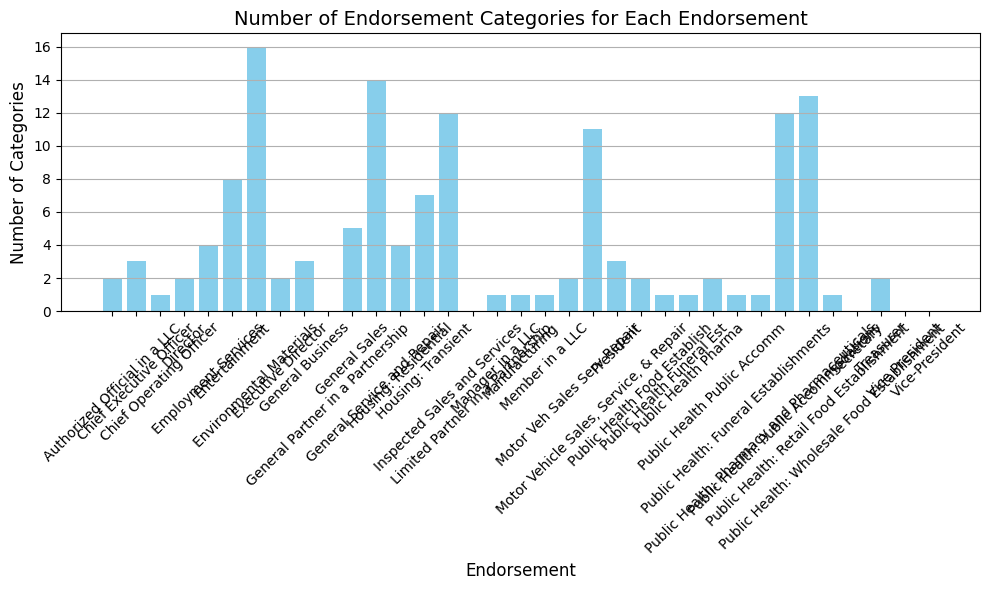

In [ ]:
import itertools
import matplotlib
import matplotlib.pyplot as plt

endorsement_categories = {}

# Create a set to hold unique endorsements and categories
unique_endorsements = set(business_license_df["Endorsement"])
unique_categories = set(business_license_df["Endorsement category"])
print("unique endorsements:", unique_endorsements)
# Get unique permutations of endorsements and categories
permutations = list(itertools.permutations(unique_endorsements.union(unique_categories), 2))

# Create a DataFrame from the permutations
permutations_df = pd.DataFrame(permutations, columns=["Endorsement", "Endorsement Category"])

# Display the DataFrame as a table
print("Unique permutations of endorsements and endorsement categories:")
print(permutations_df)

#Creating a bar chart dispalying the number of endorsement categories for each endorsement
# Count unique endorsement categories for each endorsement
endorsement_counts = business_license_df.groupby("Endorsement")["Endorsement category"].nunique().reset_index()

# Rename columns for clarity
endorsement_counts.columns = ["Endorsement", "Number of Categories"]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(endorsement_counts["Endorsement"], endorsement_counts["Number of Categories"], color='skyblue')
plt.title("Number of Endorsement Categories for Each Endorsement", fontsize=14)
plt.xlabel("Endorsement", fontsize=12)
plt.ylabel("Number of Categories", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')

# Display the bar chart
plt.tight_layout()
plt.show()


## Since we can notice multiple endorsement's containing "public health", we will create a additional subset of data solely containing licnese applications with "public health" in the endorsement name.

This way, we can attempt to gain a more granular insight as to how the DLCP operationalizes public health related endorsements.

In [ ]:
subset_df = business_license_df[business_license_df["Endorsement"].str.contains("public health", case=False, na=False)]
print(subset_df['Endorsement category'].unique())

# Display the subset DataFrame

#print("\nSubset DataFrame (Endorsements containing 'public health'):")
#print(subset_df)

['Restaurant' 'Delicatessen' 'Patent Medicine' 'Grocery Store'
 'Food Products' 'Swimming Pool' 'Beauty Shop' 'Mobile Delicatessen'
 'Caterers' 'Beauty Shop Nails' 'Mattress Storage' 'Barber Shop' 'Bakery'
 'Food Vending Machine' 'Public School Cafeteria' 'Marine Food Retail'
 'Candy Manufacturing' 'Funeral Establishment' 'Swimming Pool DC'
 'Ice Cream Manufacture' 'Beauty Shop Esthetics' 'Beauty Shop Braiding'
 'Health Spa' 'Health Spa Sales' 'Massage Establishment'
 'Beauty Shop Electrology' 'Marine Food Product Wholesale'
 'Commission Merchant Food']


#EVALUATING MISSINGNESS IN THE DATA, BY PARAMETER
